**Russian License Plate Blurring**

 Our goal will be to use Haar Cascades to blur license plates detected in an image!

 Russians are famous for having some of the most entertaining DashCam footage on the internet. OpenCV comes with a Russian license plate detector .xml file.

Import the usual libraries

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in the car_plate.jpg file

In [14]:
img = cv2.imread("car_plate.jpg")

Create a function that displays the image in a larger scale and correct coloring for matplotlib.

In [15]:
def display(img):
  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111)
  new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(new_img)

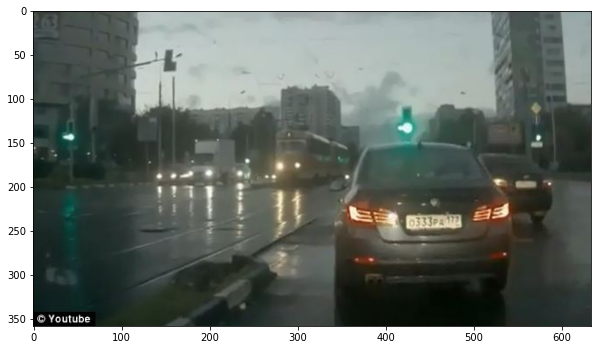

In [16]:
display(img)

Load the haarcascade_russian_plate_number.xml file.

In [17]:
plate_cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

Create a function that takes in an image and draws a rectangle around what it detects to be a license plate. Keep in mind we're just drawing a rectangle around it for now, later on we'll adjust this function to blur. You may want to play with the scaleFactor and minNeighbor numbers to get good results.

In [18]:
def detect_plate(img):

  plate_img = img.copy()
  plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.5,minNeighbors=3)

  for (x,y,w,h) in plate_rects:

    cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),4)

  return plate_img

In [19]:
result = detect_plate(img)

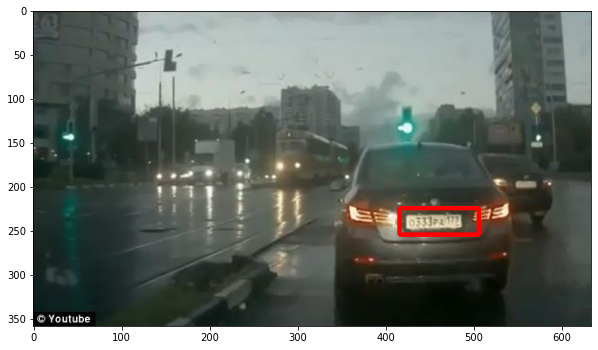

In [20]:
display(result)

**Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you to take:**

The hardest part is converting the (x,y,w,h) information into the dimension values we need to grab an ROI 
Once grabbed the ROI using the (x,y,w,h) values returned, we want to blur that ROI. we can use cv2.medianBlur for this.
Now that we have a blurred version of the ROI (the license plate) we will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [21]:
def detect_and_blur_plate(img):

  plate_img = img.copy()
  roi = img.copy()

  plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.5,minNeighbors=3)

  for (x,y,w,h) in plate_rects:

    roi = roi[y:y+h,x:x+w]
    blurred_roi = cv2.medianBlur(roi,7)

    plate_img[y:y+h,x:x+w] = blurred_roi

  return plate_img

In [22]:
result = detect_and_blur_plate(img)

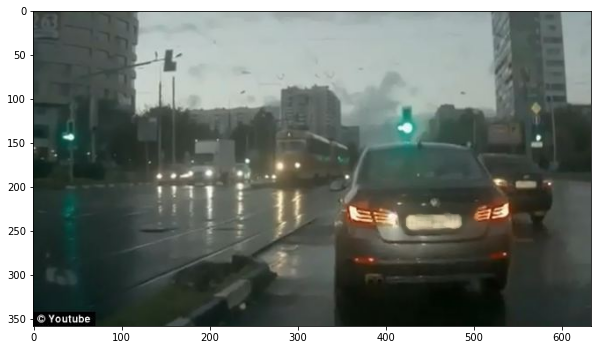

In [23]:
display(result)